# **Fracture Detection from X-ray Images using CNN**

In this notebook we will explore the development and implementation of a Convolutional Neural Network (CNN) for detecting fractures in X-ray images. This model is trained on the **Fracture Multi-Region X-ray dataset** from Kaggle, which consists of labeled X-ray images indicating the presence or absence of fractures.



## Objective

The primary goal of this notebook is to build a binary classification model that can accurately identify whether a fracture is present in an X-ray image. We will achieve this using a deep learning approach, specifically a CNN, which is well-suited for image classification tasks.



## Model Architecture

The CNN model we'll be using is composed of:

- **5 Convolutional Layers**: These layers will extract features from the input images, such as edges, textures, and patterns that are indicative of fractures.
- **3 Fully Connected Layers**: After feature extraction, the fully connected layers will classify the image as either having a fracture or not.



## Workflow

1. **Data Loading and Preprocessing**: We'll start by loading the X-ray dataset, preprocessing the images, and splitting the data into training and validation sets.

2. **Model Building**: Next, we'll define our CNN model architecture with 5 convolutional layers followed by 2 fully connected layers.

3. **Training the Model**: We'll train the model using the training set and monitor its performance on the validation set.

4. **Evaluation**: We evaluate the training and see jow the loss is minimized per epoch and also evalute the models prediction using a Confusion matrix, recall, precision and an F1 score.

5. **Prediction**: Finally, we'll demonstrate how to use the trained model to make predictions on new X-ray images.






___________________________________________________________________________________________________________________________________________________________________________


The two cells below are codes from Kaggle to to download the dataset in the respective environment.


The dataset is available at [Bone Fracture Multi-Region X-ray Data](https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data).



Dataset Contents:
This dataset contains 10,580 radiographic images (X-ray) data.

Training Data -
Images: 9246

Validation Data -
Images: 828

Test Data -
Images: 506

In [41]:


# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fracture-multi-region-x-ray-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4854718%2F8201044%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240817%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240817T155027Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2faeaa3188ac7e5be229a8cae33e7e8df82861764e88face36878408011f2333b3fd8b84dd7ba87f48d20a0c3ed7055fabc60a01084580cc230bc78ac7748183f02a94c8cbf8863962ff00b1e75667738010272465c73986cb483224a6e923aa85bfcc10783cc4f8143a86ce623b695dd1aecdde0116be6c0894f6e3b1cf91aa690aee49097f7368271d111d7eb2a7bb8fe8d57ba30de029f05ffa50086e68472898aeed1d7717bd28c7094f60ee4e52979eb4f4846173bb1127c9635427af422a5cbc81a95d5fddf54b99960ffbc54453febbe2a4d7cfe5841d510f8007799195a20a2c5d80b0d0155144af62a41fd3ef52eee93baea74bb3231ecce4edf5df'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 504652653 bytes downloaded
Downloaded and uncompressed: fracture-multi-region-x-ray-data
Data source import complete.


In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/91-rotated2-rotated2 - Copy.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/93-rotated3-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/4-rotated2-rotated3 - Copy (1).jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/Spiral-fracture-on-X-ray.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/89-rotated1-rotated3-rotated1 - Copy (1).jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Clas

In [43]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
import numpy as np
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


In [44]:
# Device agnostic code to check if GPU is available or else use CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [45]:
train_path = "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
val_path = "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val"
test_path = "/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"
train_path

'/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train'

In [46]:
# We firstly need to remove any corrupted images which can basically be determined by getting IOError etc when trying to open from PIL's Image.open
#We create a function to traverse through the dataset directory opening every image and check if its successful

import os
from PIL import Image  # For handling image files

def identify_and_remove_corrupted_images(dataset_dir):
    corrupted_images = []  # List to store paths of corrupted images

    # Traverse through the dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            try:
                # Attempt to open the image
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    img.load()
            except (IOError, OSError) as e:
                # If an error occurs (indicating a corrupted image), print and add to the list
                print(f"Corrupted image detected: {image_path}")
                corrupted_images.append(image_path)
                # Optionally remove the corrupted image
                # os.remove(image_path)

    return corrupted_images  # Return the list of corrupted images


In [47]:
# A list of paths for corrupted image
corrupted_images_train = identify_and_remove_corrupted_images(train_path)
corrupted_images_val = identify_and_remove_corrupted_images(val_path)

Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004134.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004149.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004143.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004308.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004347.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classi

In [48]:
# Transforming the image, using center crop for capturing important information, and also using data augmentation techniques like random flip

transformed = transforms.Compose([transforms.ToTensor(),
                                  transforms.CenterCrop(400),
                                  transforms.RandomHorizontalFlip(),
#                                   transforms.Resize((400,400)),
                                  transforms.Grayscale(num_output_channels=1)


])

transformed_val = transforms.Compose([transforms.ToTensor(),
                                  transforms.CenterCrop(400),
#                                   transforms.RandomHorizontalFlip()
#                                   transforms.Resize((400,400)),
                                  transforms.Grayscale(num_output_channels=1)


])

We will use **ImageFolder** to load our data. ImageFolder is a PyTorch utility class used to load image data from a directory where images are organized into subfolders. Each subfolder represents a class, and the images within are the data samples. When you use ImageFolder, it automatically assigns labels based on the folder names and prepares the images for training, applying any specified transformations. Our dataset has the images of fractured and not fractured data at at folder 0 and 1.

In [49]:
from torchvision.datasets import ImageFolder
train_df = ImageFolder(root = train_path,
                      transform= transformed,
                      target_transform=None,
                      is_valid_file=None
                      )

val_df =ImageFolder(root = val_path,
                   transform = transformed_val,
                   target_transform = None,
                   is_valid_file = None
                   )
val_df

Dataset ImageFolder
    Number of datapoints: 829
    Root location: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val
    StandardTransform
Transform: Compose(
               ToTensor()
               CenterCrop(size=(400, 400))
               Grayscale(num_output_channels=1)
           )

In [50]:
#Filtering out the corrupted images
train_df.samples = [(img, target) for img, target in train_df.samples if img not in corrupted_images_train]
val_df.samples = [(img, target) for img, target in val_df.samples if img not in corrupted_images_val]

In [51]:
# Creating a dictionary of labels
class_to_id = train_df.class_to_idx
idx_to_class = {i : j for j , i in class_to_id.items()}
idx_to_class

{0: 'fractured', 1: 'not fractured'}

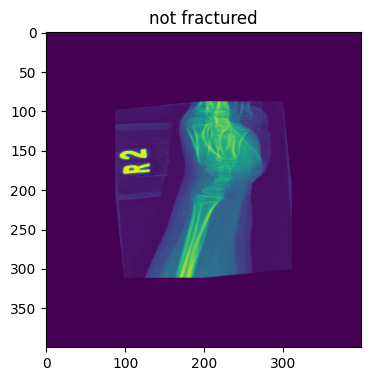

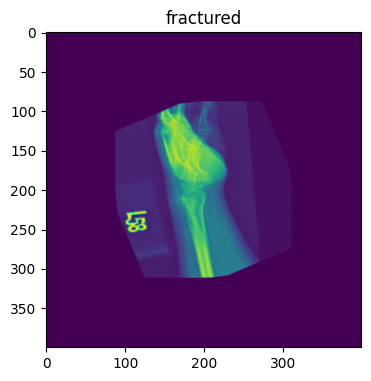

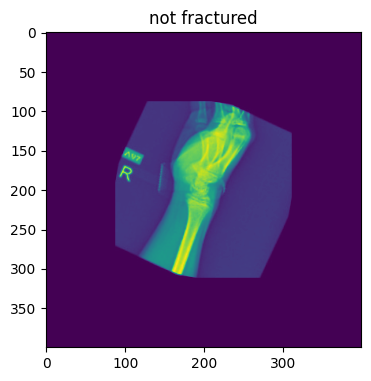

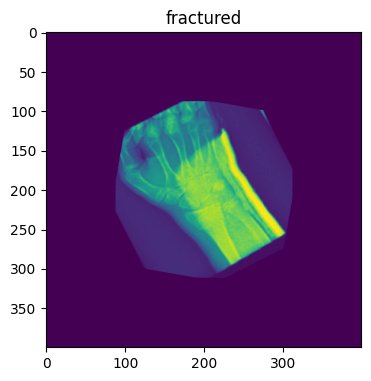

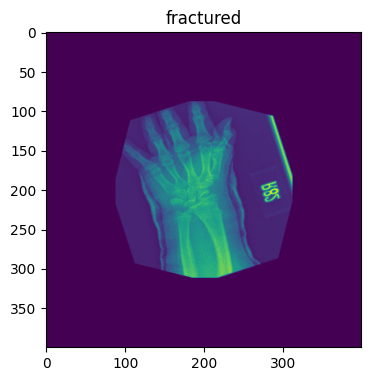

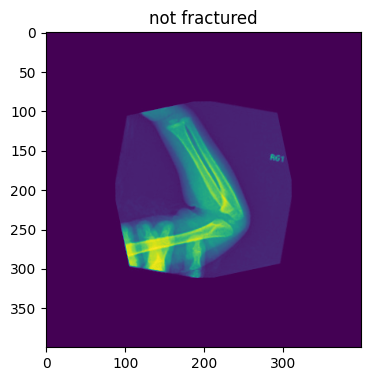

In [52]:
#Using torch.randint() to plot out random images from the dataset with its respective label of fractured or not.

torch.manual_seed(42)
for i in range(6):
    j=torch.randint(0,len(train_df), size = [1]).item()
    image,label = train_df[j]
    plt.figure(figsize=(18,9))
    plt.subplot(2,3,i+1)
    plt.imshow(image.numpy().transpose(1,2,0))
    plt.title(idx_to_class[label])



In [53]:
BATCH_SIZE = 32

train = DataLoader(dataset = train_df,
                  batch_size = BATCH_SIZE,
                  shuffle= True)
val = DataLoader(dataset = val_df,
                batch_size=BATCH_SIZE)

In [54]:
# Crosschecking in a random batch the ratio of fractured data vs non fractured data
image,label = next(iter(train))
# image.shape, label
fractured = 0
not_fractured=0
for i in range(len(label)):
    if label[i]==0:
        fractured+=1
    else:
        not_fractured +=1


print(f"Numebr of fractured values in Batch is : {fractured}\n and non Fractured is : {not_fractured}")

Numebr of fractured values in Batch is : 12
 and non Fractured is : 20


We now define a custom deep convolutional neural network (CNN) class, deepcnn, using PyTorch. This network is designed for binary classification tasks on single-channel (grayscale) images. The model consists of:


**Conv1:** Takes the input image of size [1, 1, 400, 400] and applies 96 filters with a kernel size of 11x11. Output size after this layer is [1, 96, 98, 98].

**Conv2:** Applies 256 filters with a kernel size of 5x5. Output size after this layer is [1, 256, 48, 48].

**Conv3:** Applies 384 filters with a kernel size of 3x3. Output size after this layer is [1, 384, 23, 23].
**Conv4:** Another layer with 384 filters and a kernel size of 3x3. Output size remains [1, 384, 23, 23].
**Conv5**: Applies 256 filters with a kernel size of 3x3, reducing the spatial dimensions to [1, 256, 11, 11].
Pooling and Batch Normalization:

After Conv1, Conv2, and Conv5,** MaxPooling** layers are used to reduce the spatial dimensions.
**Batch Normalization** is applied after Conv1 and Conv2 to stabilize learning.


**Fully Connected Layers (3 Layers):**

**FC1:** Takes the flattened output of the last convolutional layer (with a size of 30976) and passes it through two fully connected layers of size 4096 each.

**FC2:** The final fully connected layer reduces the output to a single unit, indicating the binary classification.


Dropout Layers:

Dropout is applied twice in the fully connected layers to prevent overfitting.


Activation Functions:

ReLU activations are used after each convolutional and fully connected layer to introduce non-linearity.
Key Parameters:
The model has a total of approximately 147 million trainable parameters.
The convolutional layers capture spatial hierarchies, while the fully connected layers are responsible for decision making based on the learned features.


**P.S. **: The architecture below is finalized after fair amount of trial and error and regularization and normalization is also included to avoid variance.

In [55]:
class deepcnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.Conv_1 = nn.Sequential(
          nn.Conv2d(in_channels = 1, out_channels = 96, kernel_size = 11, stride = 4, padding = 0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2),
          nn.BatchNorm2d(96))

        # 2nd conv layer
        self.Conv_2 = nn.Sequential(
          nn.Conv2d(in_channels = 96, out_channels = 256, kernel_size = 5, stride = 1, padding = 2),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2),
          nn.BatchNorm2d(256))

        # 3rd conv layer
        self.Conv_3 = nn.Sequential(
          nn.Conv2d(in_channels = 256, out_channels = 384, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU())

        # 4th conv layer
        self.Conv_4 = nn.Sequential(
          nn.Conv2d(in_channels = 384, out_channels = 384, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU())

        # 5th conv layer
        self.Conv_5 = nn.Sequential(
          nn.Conv2d(in_channels = 384, out_channels = 256, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2))

        # 1st fully connected layer
        self.FC1 = nn.Sequential(
          nn.Flatten(),
          nn.Dropout(0.5),
          nn.Linear(256*11*11, 4096),
          nn.ReLU(),
          nn.Dropout(0.5),
          nn.Linear(4096, 4096),
          nn.ReLU(),
          nn.Linear(4096, 512),
          nn.ReLU(),
          )

#         # 2nd fully connected layer
#         self.FC2 = nn.Sequential(
#           nn.Dropout(0.5),
#           nn.Linear(4096, 4096),
#           nn.ReLU())

#         # 3rd fully connected layer
#         self.FC3 = nn.Sequential(
#           nn.Linear(4096, 512),
#           nn.ReLU()
#         )

        # 3rd fully connected layer --> output layer
        self.FC2 = nn.Sequential(
          nn.Linear(512, 1))

    def forward(self, x):   # AlexNet forward propagation function
        # Propagate input through the layers of the network
        x = self.FC2(self.FC1(self.Conv_5(self.Conv_4(self.Conv_3(self.Conv_2(self.Conv_1(x)))))))

        return x


In [56]:
# model = framodel()
model = deepcnn().to(device)
model

deepcnn(
  (Conv_1): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv_2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv_3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (Conv_4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (Conv_5): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilati

In [57]:
!pip install torchinfo
from torchinfo import summary

In [58]:
summary(model = model,
        input_size = (1,1,400,400),
        col_width=20,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        )

Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Trainable
deepcnn                                  [1, 1, 400, 400]     [1, 1]               --                   True
├─Sequential: 1-1                        [1, 1, 400, 400]     [1, 96, 48, 48]      --                   True
│    └─Conv2d: 2-1                       [1, 1, 400, 400]     [1, 96, 98, 98]      11,712               True
│    └─ReLU: 2-2                         [1, 96, 98, 98]      [1, 96, 98, 98]      --                   --
│    └─MaxPool2d: 2-3                    [1, 96, 98, 98]      [1, 96, 48, 48]      --                   --
│    └─BatchNorm2d: 2-4                  [1, 96, 48, 48]      [1, 96, 48, 48]      192                  True
├─Sequential: 1-2                        [1, 96, 48, 48]      [1, 256, 23, 23]     --                   True
│    └─Conv2d: 2-5                       [1, 96, 48, 48]      [1, 256, 48, 48]     614,656              True
│    └─ReLU: 2-6  

The model has almost 150 million trainable parameters.

We use The Binary Cross-Entropy Loss with Logits, which combines a sigmoid layer and the binary cross-entropy loss in one single class. It is used for binary classification tasks where the model outputs raw logits (unnormalized scores)

We have also selected the Adam optimizer, which is used to update the model's parameters. It combines the advantages of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp, and is particularly well-suited for problems with sparse gradients. The learning rate is set to 0.0001.

In [59]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.0001)
loss_fn , optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0
 ))

**The model was previously trained for 10 epochs and the weights were saved**

In [60]:
#To upload previously saved parameters
model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

In [61]:
#Empty list which is needed to plot for evalutaion of model
trainlist = []
testlist = []
epochlist = []
accuracylist = []

In [63]:
# We train the model and we use sigmoid function and a threshold of 0.5 to determine the label to be 0 or 1  which determines fractured or not


EPOCHS = 5

for epoch in range(EPOCHS):
    trainloss = 0
    for batch, (X,y) in enumerate(train):
        X=X.to(device)
        y=y.to(device)

        model.train()

        y_preds = model(X).squeeze()

        loss = loss_fn(y_preds, y.float())

        trainloss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    trainloss /= len(train)
    trainlist.append(trainloss)

    test_loss=0
    correct=0
    acc=0
    total = 0

    model.eval()
    with torch.inference_mode():

        for x_test, y_test in val:
            x_test = x_test.to(device)
            y_test = y_test.to(device)

            y_val=model(x_test).squeeze()

            val_loss = loss_fn(y_val, y_test.float())

            test_loss+= val_loss.item()


            preds = (torch.sigmoid(y_val) > 0.5).float()  # Convert to binary predictions
            correct += (preds == y_test.float().view_as(preds)).sum().item()
            total += y_test.size(0)


        test_loss /= len(val)
        testlist.append(test_loss)
        acc = (correct/total) * 100
        epochlist.append(epoch)
        accuracylist.append(acc)

    print(f"Epochs : {epoch}||| train loss : {trainloss}||| test loss {test_loss}||| Accuracy {acc} ")





Epochs : 0||| train loss : 0.026929152361973043||| test loss 0.1884124959158203||| Accuracy 93.31713244228432 
Epochs : 1||| train loss : 0.032415463503127545||| test loss 0.13209086986172572||| Accuracy 95.01822600243013 
Epochs : 2||| train loss : 0.0296402380861251||| test loss 0.1296880039503787||| Accuracy 94.2891859052248 
Epochs : 3||| train loss : 0.029840140188071806||| test loss 0.11728087148551608||| Accuracy 94.77521263669502 
Epochs : 4||| train loss : 0.01716918401978027||| test loss 0.1133622228386102||| Accuracy 95.1397326852977 


In [64]:
#To save the Model Parameters
torch.save(model.state_dict(), 'best_model.pth')

We now plot loss and accuracy curve per epoch.

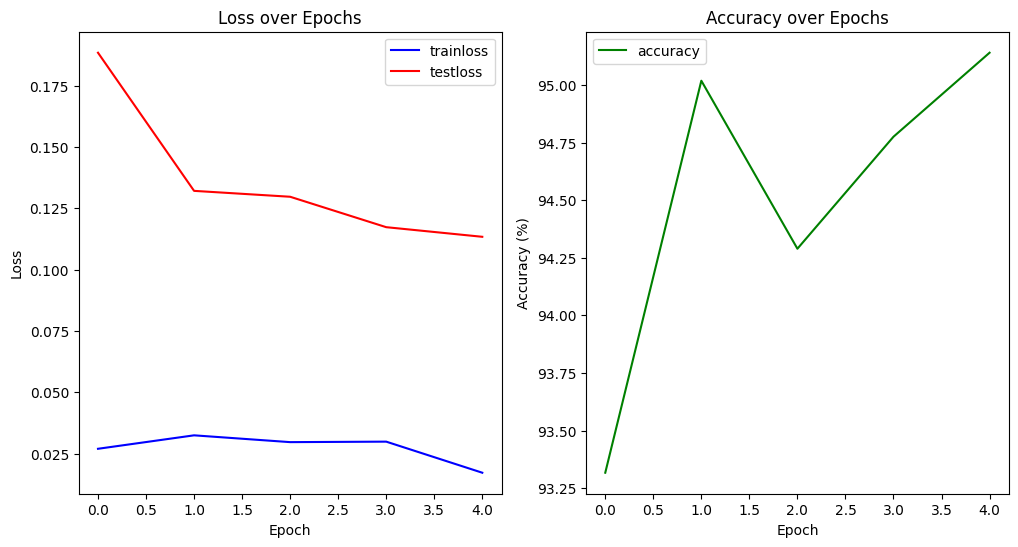

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochlist, trainlist, color = "blue", label = "trainloss")
plt.plot(epochlist, testlist, color = "red", label = "testloss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochlist, accuracylist, color="green", label = "accuracy" )
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
# plt.fit()

plt.legend()
plt.show()

Our deep convolutional neural network (CNN) described above achieves an impressive 95% accuracy on the cross validation set, effectively detecting fractures in X-ray images. This result demonstrates the model's capability to learn and generalize from the data using our robust architecture.

During training we also see the loss and accuracy further declining, so training for more epochs with some changes in hyperparameter could result in even better performance.

_______________________________________________________________________________________________________________________________


Lets now prepare the test dataset, and check our models accuracy on test dataset. The model has still not seen this dataset, so this is more of a real world test

In [66]:
corrupted_images_test = identify_and_remove_corrupted_images(test_path)

Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004134.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004149.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004143.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004308.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004347.jpg
Corrupted image detected: /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classificat

In [67]:
test_df =ImageFolder(root = test_path,
                   transform = transformed_val,
                   target_transform = None,
                   is_valid_file = None
                   )

In [68]:
test_df.samples = [(img, target) for img, target in test_df.samples if img not in corrupted_images_test]

In [76]:
BATCH_SIZE = 32

test = DataLoader(dataset = test_df,
                  batch_size = BATCH_SIZE,
                  shuffle= False)

In [77]:
# Initialize lists to store metrics for evaluations of  the model
all_labels = []
all_preds = []
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

In [78]:
model.eval()
with torch.inference_mode():

    for x_test, y_test in test:

        x_test = x_test.to(device)
        y_test = y_test.to(device)

        y_val=model(x_test).squeeze()

        val_loss = loss_fn(y_val, y_test.float())

        test_loss+= val_loss.item()


        preds = (torch.sigmoid(y_val) > 0.5).float()  # Convert to binary predictions
        correct += (preds == y_test.float().view_as(preds)).sum().item()
        total += y_test.size(0)

        # Store labels and predictions
        all_labels.extend(y_test.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

        misclassified_idx = (preds != y_test.float().view_as(preds)).nonzero(as_tuple=True)[0]
        for idx in misclassified_idx:
            misclassified_images.append(x_test[idx].cpu())
            misclassified_labels.append(y_test[idx].cpu())
            misclassified_preds.append(preds[idx].cpu())

    # Convert lists to tensors
    all_labels = torch.tensor(all_labels)
    all_preds = torch.tensor(all_preds)


    test_loss /= len(val)
    acc = (correct/total) * 100

print(f"Epochs : {epoch}||| train loss : {trainloss}||| test loss {test_loss}||| Accuracy {acc} ")

Epochs : 4||| train loss : 0.01716918401978027||| test loss 0.0481125177200049||| Accuracy 96.16017553483269 


In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

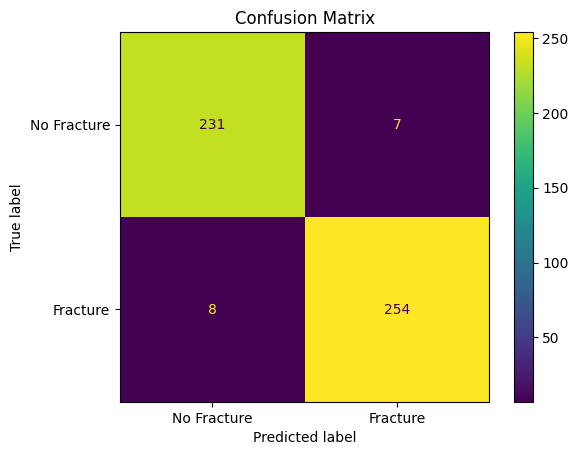

In [80]:
# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Fracture', 'Fracture'])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

**Confusion Matrix:** This is plotted using the ConfusionMatrixDisplay from sklearn.metrics. It visually shows the counts of true positive, true negative, false positive, and false negative predictions.

On the test set we can see it predicted 8 Fracture plates as not fractured, and 7 non fractured plate as Fractured. We will later analyze all the misclassification

In [81]:
# Calculate precision, recall, and F1 score
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.97
Recall: 0.97
F1 Score: 0.97


The metrics —Precision, Recall, and F1 Score, all at 0.97—indicate that our model performs exceptionally well on the test set.


**1. Precision (0.97**):
Definition: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. In this case, 97% of the images that the model predicted as having a fracture are indeed true positives.
Implication: The model is very accurate when it predicts a fracture, minimizing false positives.


**2. Recall (0.97):**
Definition: Recall measures the proportion of true positive predictions out of all actual positive cases. Here, 97% of the actual fracture cases are correctly identified by the model.
Implication: The model is very effective at identifying cases of fractures, minimizing false negatives.


**3. F1 Score (0.97):**
Definition: The F1 Score is the harmonic mean of Precision and Recall, providing a single metric that balances both. An F1 Score of 0.97 reflects a good balance between Precision and Recall.
Implication: This score confirms that the model is not only precise but also has a high recall, indicating overall strong performance in classifying fractures.


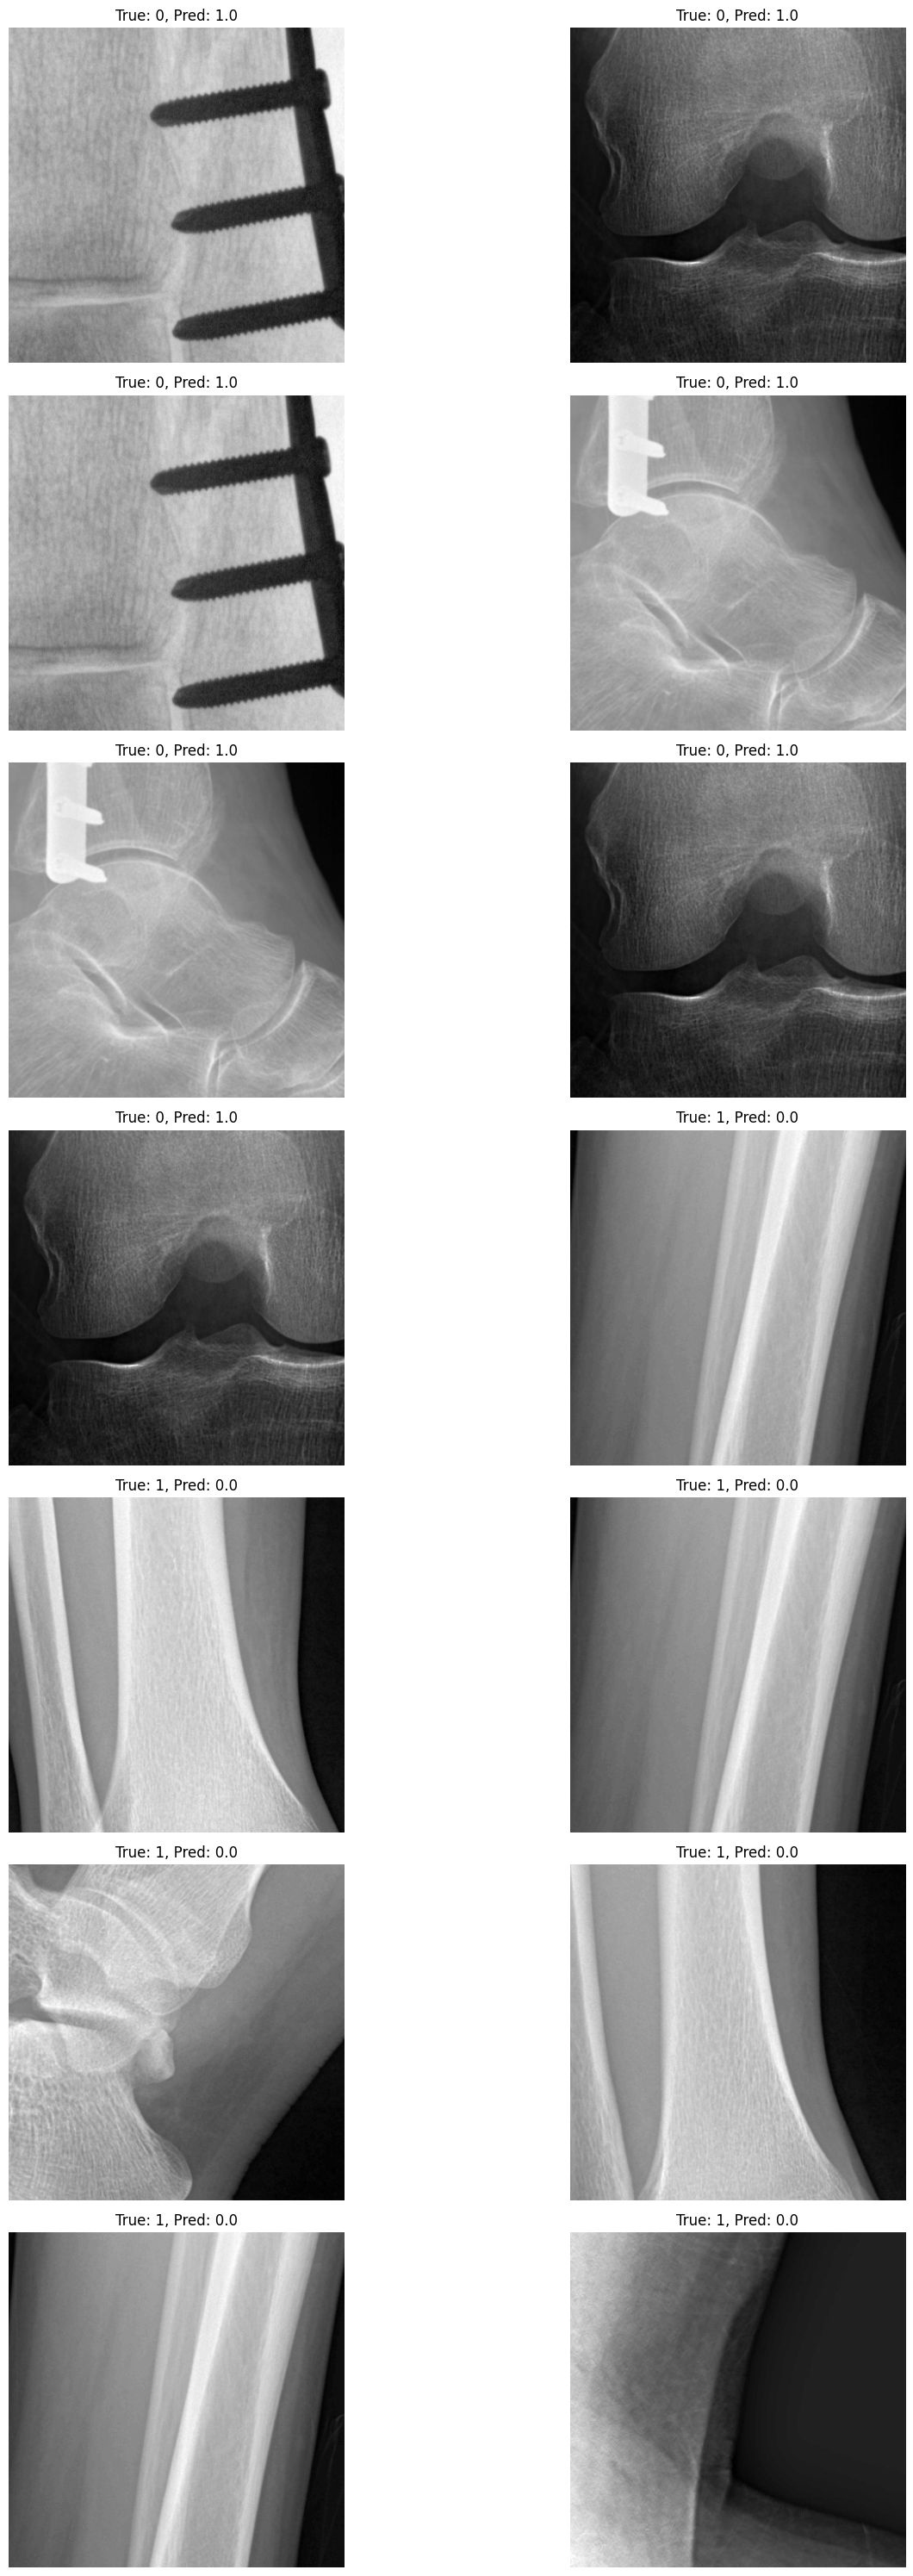

In [100]:
# Plot the misclassified images
num_misclassified = len(misclassified_images)
plt.figure(figsize=(16, 30))  # Increase the figure size

for i in range(min(num_misclassified, 14)):  # Show up to 8 misclassified examples
    plt.subplot(7, 2, i + 1)  # Arrange images in a 4x2 grid for larger size
    plt.imshow(misclassified_images[i].squeeze(), cmap='gray')
    plt.title(f"True: {misclassified_labels[i].item()}, Pred: {misclassified_preds[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()

As we can see above the model has misclassified few cases of 'Osteosynthesis', which is a procedure commonly used to stabilize and support fractured bones where screws are used along with platesn rods, pins etc to hold the bone in proper place for healing. The other cases seem as the center crop did not seem to capture the fractured part of the plate. Increasing the number of plates of diagnosed 'Osteosynthesis' and slightly altering pre-processing of the image caan further solve these problems.

In [91]:
torch.save(model.state_dict(), 'best_model.pth')

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
# image_path = "/content/00004541.png"

# **Using a real world xray plate to test the model**

In [93]:
image_path = "/content/8c230b10-1c44-484d-85e3-fb6cd2d7dcc8.jpeg"

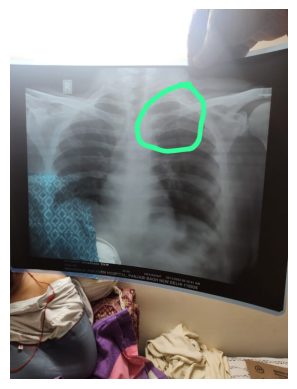

In [94]:
if os.path.exists(image_path):
    # Load the image
    image = Image.open(image_path)

    # Display the image
    plt.imshow(image, cmap='gray')  # `cmap='gray'` if it's a grayscale image
    plt.axis('off')  # Hide the axis
    plt.show()
else:
    print(f"The file {image_path} does not exist.")

In [95]:
def load_image(image_path):
    image = Image.open(image_path)
    return transformed_val(image).unsqueeze(0)

In [96]:
imagetensor= load_image("/content/8c230b10-1c44-484d-85e3-fb6cd2d7dcc8.jpeg")

In [97]:
model.eval()
with torch.inference_mode():
    # plt.imshow(image.to('cpu').numpy().transpose(1,2,0))
    imagetensor = imagetensor.to(device)
    output = model(imagetensor)
    pred = (torch.sigmoid(output) > 0.5).float()




(-0.5, 959.5, 1279.5, -0.5)

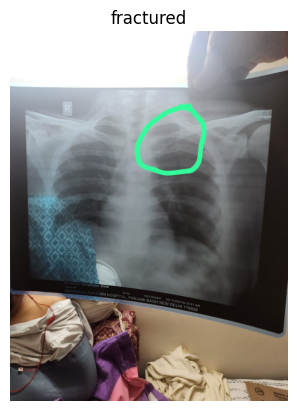

In [98]:

 plt.imshow(image, cmap='gray')
 plt.title(idx_to_class[pred.item()])
 plt.axis(False)


We see the model successfully predicted a fractured plate.

# **Conclusion:**

**Overall Performance:**

 The model exhibits excellent performance in both detecting fractures and avoiding false positives. With Precision, Recall, and F1 Score all at 0.97, the model demonstrates robustness and reliability in its predictions.
 Given these high scores, the model is likely well-suited for practical use in detecting fractures from X-ray images.




**Further Improvement:**

Real-world Testing: We still need to validate the model on a diverse set of real-world X-ray images to ensure its effectiveness in varied conditions. Regularly update and monitor the model with new data to maintain performance and adapt to potential changes in data patterns.


The model's high accuracy indicates strong performance in binary classification tasks, making it a valuable tool for medical imaging analysis. However, comparing it to its respective human level performence, we should always look towards the accuracy of 100% which a trained radiologist usually achieves, hence there are still opportunities for further improvement:

**Data Augmentation**: Implementing more advanced data augmentation techniques (e.g., random rotations, flips, and brightness adjustments) can help the model generalize better by learning from a more diverse set of images.

**Fine-Tuning Hyperparameters**: Exploring different learning rates, batch sizes, and optimizer choices (e.g., AdamW or RMSprop) could lead to better convergence and potentially higher accuracy.

**Regularization:** Adding L2 regularization or increasing dropout rates might prevent overfitting and improve the model's robustness.

**Transfer Learning:** Leveraging pre-trained models, such as EfficientNet or ResNet, and fine-tuning them on the dataset could enhance performance, especially when dealing with limited data.

**Ensemble Methods:** Combining predictions from multiple models trained with different architectures or initializations could reduce variance and improve overall accuracy.